In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
stroke = pd.read_csv('stroke.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


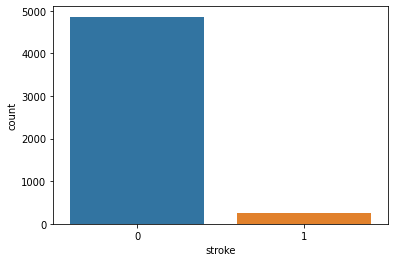

In [3]:
#check distribution

import seaborn as sns
sns.countplot(stroke['stroke'],label="Count")
plt.show()

In [5]:
stroke.info()

#noted null value in BMI
#to fill null value with mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke['bmi']=stroke['bmi'].fillna(stroke['bmi'].mean())


In [53]:
stroke['stroke'].value_counts()

#since value is insignificant, to keep in dataset instead of dropping

0    4861
1     249
Name: stroke, dtype: int64

In [56]:
#resampling technique

# Class count
count_class_0, count_class_1 = stroke['stroke'].value_counts()

# Divide by class
df_class_0 = stroke[stroke['stroke'] == 0]
df_class_1 = stroke[stroke['stroke'] == 1]

Random over-sampling:
1    4861
0    4861
Name: stroke, dtype: int64


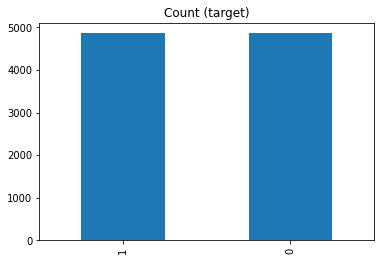

In [58]:
##Oversample techinque

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.stroke.value_counts())

df_test_over.stroke.value_counts().plot(kind='bar', title='Count (target)');

In [59]:
X = df_test_over.iloc[:, 0:11].values #isolate all input variable
y = df_test_over.iloc[:, 11].values #isolate target variable

print(X)
print(y)

[[30669 'Male' 3.0 ... 95.12 18.0 'Unknown']
 [30468 'Male' 58.0 ... 87.96 39.2 'never smoked']
 [16523 'Female' 8.0 ... 110.89 17.6 'Unknown']
 ...
 [54385 'Male' 45.0 ... 64.14 29.4 'never smoked']
 [13491 'Male' 80.0 ... 259.63 31.7 'smokes']
 [65105 'Male' 81.0 ... 213.22 26.1 'Unknown']]
[0 0 0 ... 1 1 1]


In [60]:
#encoding of independent variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df_test_over.iloc[:, 1:].apply(le.fit_transform).values

print(X)

[[  1  24   0 ...  53   0   0]
 [  1  79   1 ... 266   2   0]
 [  0  29   0 ...  49   0   0]
 ...
 [  1  66   0 ... 168   2   1]
 [  1 101   0 ... 191   3   1]
 [  1 102   0 ... 134   0   1]]


In [61]:
#encoding of dependent variable

from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
y = np.array(le.fit_transform(y))
y.reshape(len(y), 1)

print(y)

[0 0 0 ... 1 1 1]


In [72]:
#training
#must force remember this code

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [68]:
#scaling to normalise and prevent any inappropiate weightage of affected independent variable

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Accuracy is: 1.0


/Users/kenny/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  solver, opt_res, max_iter,


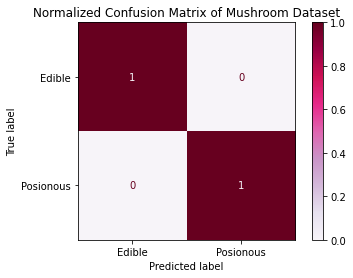

In [73]:
accuracies = dict()

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Make Prediction
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

Accuracy is: 0.6354755784061696


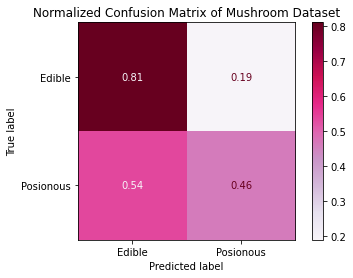

In [74]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Kernel SVM'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

Accuracy is: 1.0


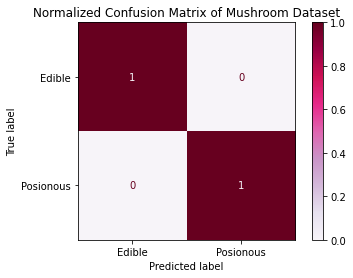

In [75]:

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

In [ ]:
#reference site 
#https://www.kaggle.com/tugcekiziltepe/mushroom-predictions-with-6-classification-models